# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

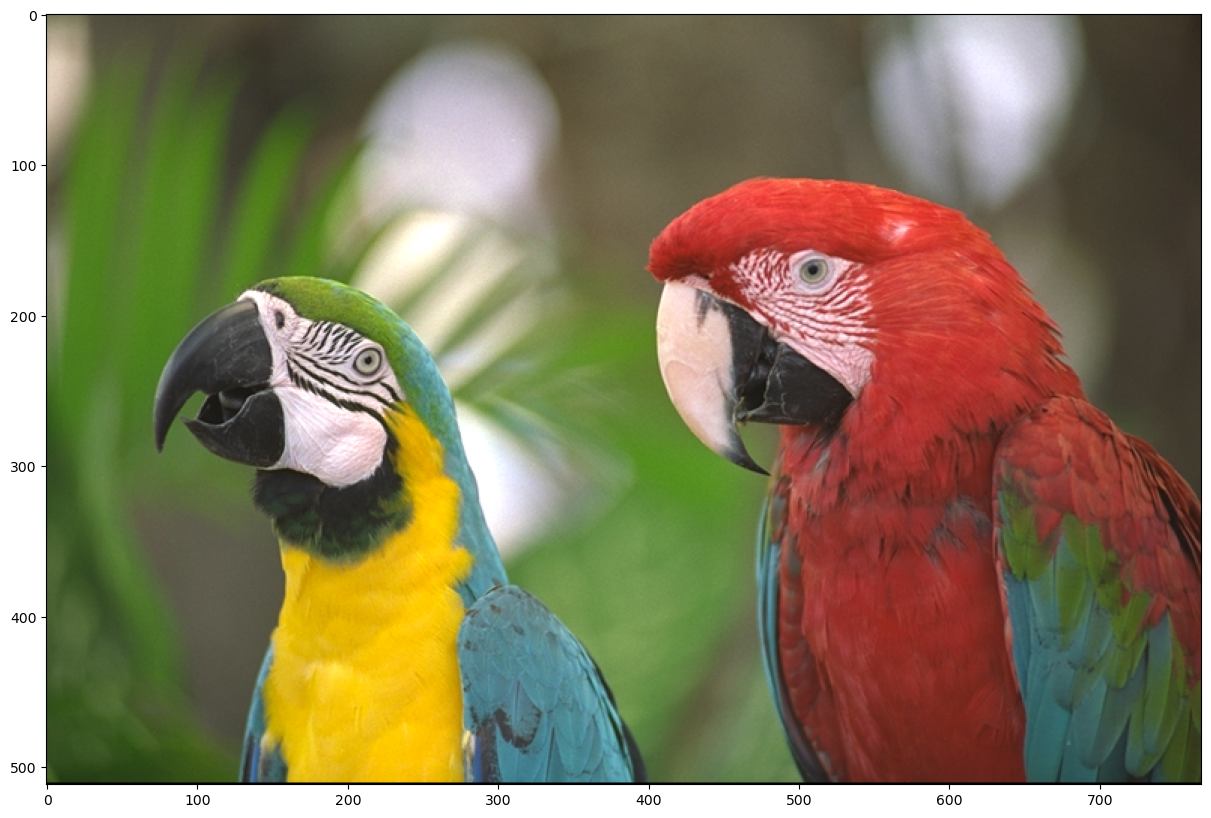

In [3]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [4]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [6]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        distances = np.linalg.norm(colors - pixel, axis=1)
        
        #Find the index of the closest color
        closest_index = np.argmin(distances)
        
        # Assign the closest color
        new_pixel = colors[closest_index]
         
        # Apply quantization
        quantized[r, c, :] = new_pixel

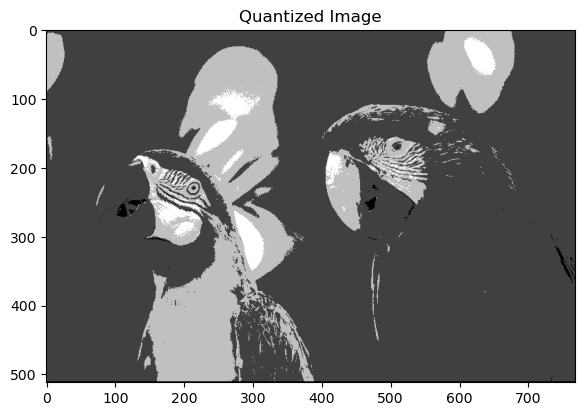

In [7]:
# Show quantized image (cast back to uint8)
plt.subplot(1, 2, 2)
plt.title("Quantized Image")
plt.imshow(quantized.astype(np.uint8))
plt.show()

In [8]:
# Compute average quantization error
error = np.linalg.norm(img - quantized, axis=2)
avg_quant_error = np.mean(error)
print(f"Average Quantization Error: {avg_quant_error:.2f}")

Average Quantization Error: 67.73


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [9]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.linalg.norm(colors - pixel, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]
             
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        # Right
        img_tmp[r, c + 1, :] += quant_error * 7 / 16
        # Bottom-left
        img_tmp[r + 1, c - 1, :] += quant_error * 3 / 16
        # Bottom
        img_tmp[r + 1, c, :] += quant_error * 5 / 16
        # Bottom-right
        img_tmp[r + 1, c + 1, :] += quant_error * 1 / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

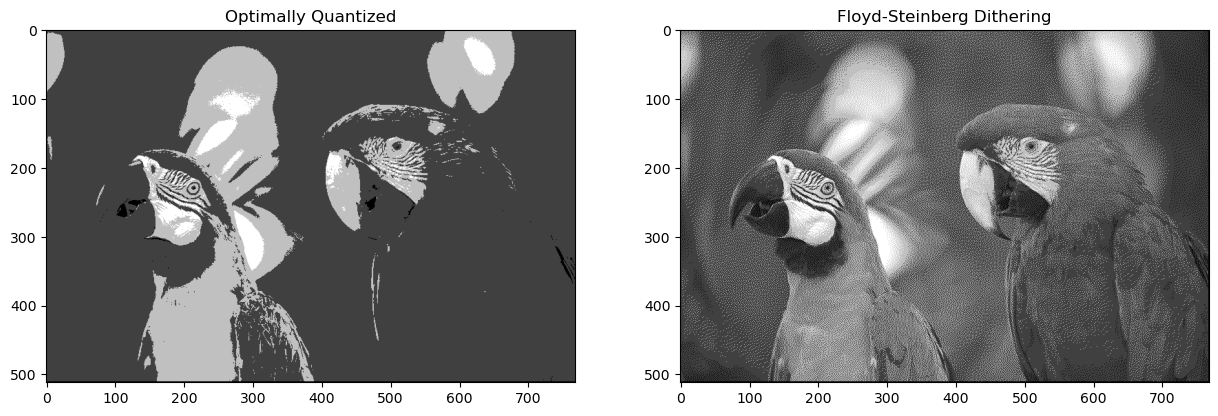

In [10]:
# Show quantized image (don't forget to cast back to uint8)

plt.subplot(121)
plt.title("Optimally Quantized")
plt.imshow(quantized.astype(np.uint8))

plt.subplot(122)
plt.title("Floyd-Steinberg Dithering")
plt.imshow(dithering.astype(np.uint8))
plt.show()


In [11]:
# Compute average quantization error for dithered image
dith_error = np.linalg.norm(img - dithering, axis=2)
avg_dith_error = np.mean(dith_error)
print(f"Average Dithering Error: {avg_dith_error:.2f}")


Average Dithering Error: 82.23


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
  Dithered one
* Which image looks better to you?
  Dithered one
* Can you repeat the same process using only two colours: black and white? Show me :-)
  Code snippet below

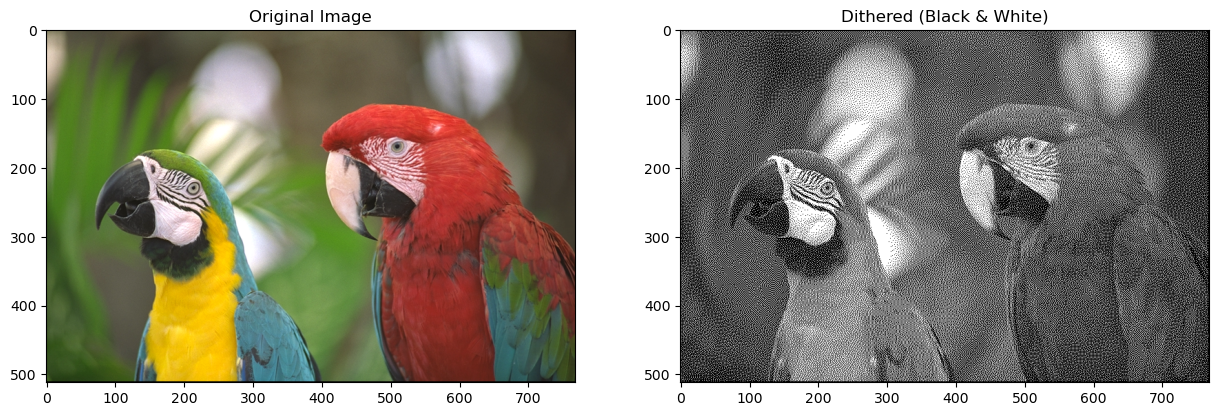

Average Dithering Error (BW): 193.10


In [12]:
# Define binary palette: black and white
bw_colors = np.array([[0, 0, 0], [255, 255, 255]])

# Make a temporal copy of the original image
img_tmp = np.copy(img)
dithering_bw = np.zeros_like(img)

for r in range(1, rows - 1):
    for c in range(1, cols - 1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]

        # Find the closest colour from the palette
        distances = np.linalg.norm(bw_colors - pixel, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = bw_colors[closest_index]

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error
        img_tmp[r, c + 1, :] += quant_error * 7 / 16
        img_tmp[r + 1, c - 1, :] += quant_error * 3 / 16
        img_tmp[r + 1, c, :] += quant_error * 5 / 16
        img_tmp[r + 1, c + 1, :] += quant_error * 1 / 16

        # Apply dithering
        dithering_bw[r, c, :] = new_pixel

# Show result
plt.subplot(121)
plt.title("Original Image")
plt.imshow(img.astype(np.uint8))

plt.subplot(122)
plt.title("Dithered (Black & White)")
plt.imshow(dithering_bw.astype(np.uint8))
plt.show()

# Compute average quantization error
dith_error_bw = np.linalg.norm(img - dithering_bw, axis=2)
avg_dith_error_bw = np.mean(dith_error_bw)
print(f"Average Dithering Error (BW): {avg_dith_error_bw:.2f}")

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

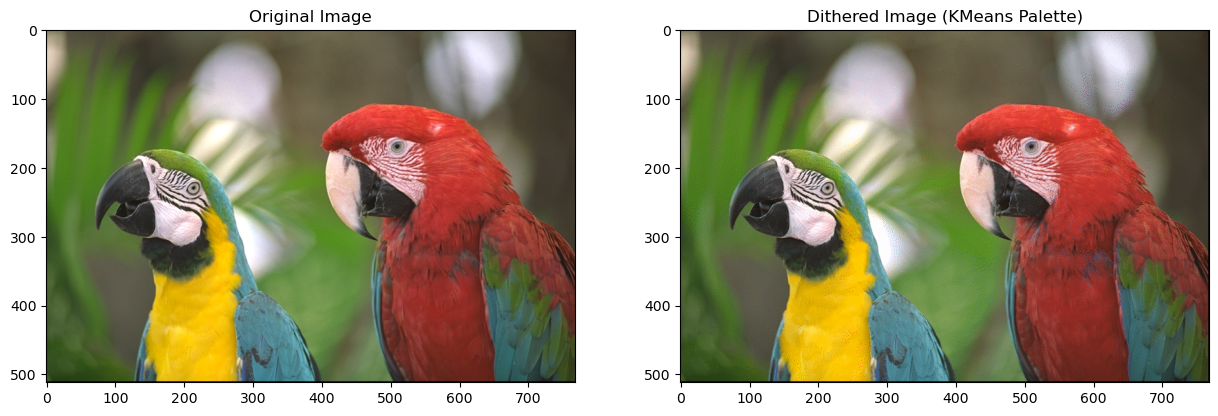

Average Dithering Error (KMeans Palette): 9.76


In [22]:
# Load the uploaded image
img = cv2.imread('data/kodim23.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32)

# Get image dimensions
rows, cols, channels = img.shape

# Generate 16 optimal colors using KMeans clustering
kmeans = KMeans(n_clusters=256, random_state=42).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_

# Make a temporal copy of the original image for error diffusion
img_tmp = np.copy(img)
dithering_kmeans = np.zeros_like(img)

# Apply Floyd-Steinberg dithering using the optimal palette
for r in range(1, rows - 1):
    for c in range(1, cols - 1):
        pixel = img_tmp[r, c, :]

        # Find the closest color from the palette
        distances = np.linalg.norm(colors - pixel, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error
        img_tmp[r, c + 1, :] += quant_error * 7 / 16
        img_tmp[r + 1, c - 1, :] += quant_error * 3 / 16
        img_tmp[r + 1, c, :] += quant_error * 5 / 16
        img_tmp[r + 1, c + 1, :] += quant_error * 1 / 16

        # Apply dithering
        dithering_kmeans[r, c, :] = new_pixel

# Show original and dithered images
plt.subplot(121)
plt.title("Original Image")
plt.imshow(img.astype(np.uint8))

plt.subplot(122)
plt.title("Dithered Image (KMeans Palette)")
plt.imshow(dithering_kmeans.astype(np.uint8))
plt.show()

# Compute average quantization error
dith_error_kmeans = np.linalg.norm(img - dithering_kmeans, axis=2)
avg_dith_error_kmeans = np.mean(dith_error_kmeans)
print(f"Average Dithering Error (KMeans Palette): {avg_dith_error_kmeans:.2f}")


Apply FS dithering the same way you did before.
* How does the result look like to you?
  Part of the information is lost. Image looks blured 
* What happens if we use 32 colours?
  Image quality is better. Error is 27
* And what happens if we use 256 colours?
  Image quality is much better. Error is around 10